### Task 3:
#### Problem Statement: 
        The goal of Task 3 is to build a machine learning classification model that predicts whether a person has heart disease based on multiple medical attributes.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

### Load Dataset

In [47]:
#Loading dataset from kaggle and printing its few rows, info and sum f null columns
df = pd.read_csv("heart_disease_uci.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.columns)



   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

### Performing EDA

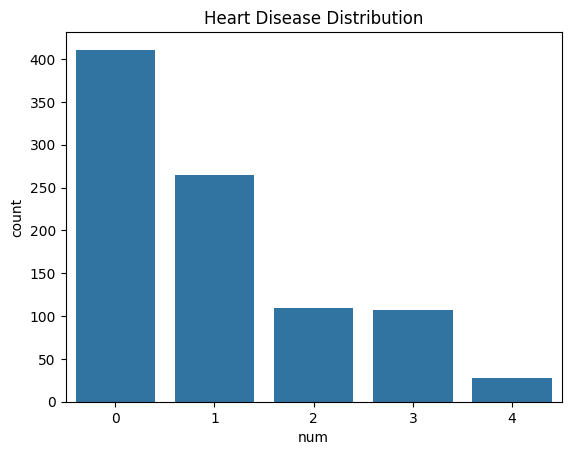

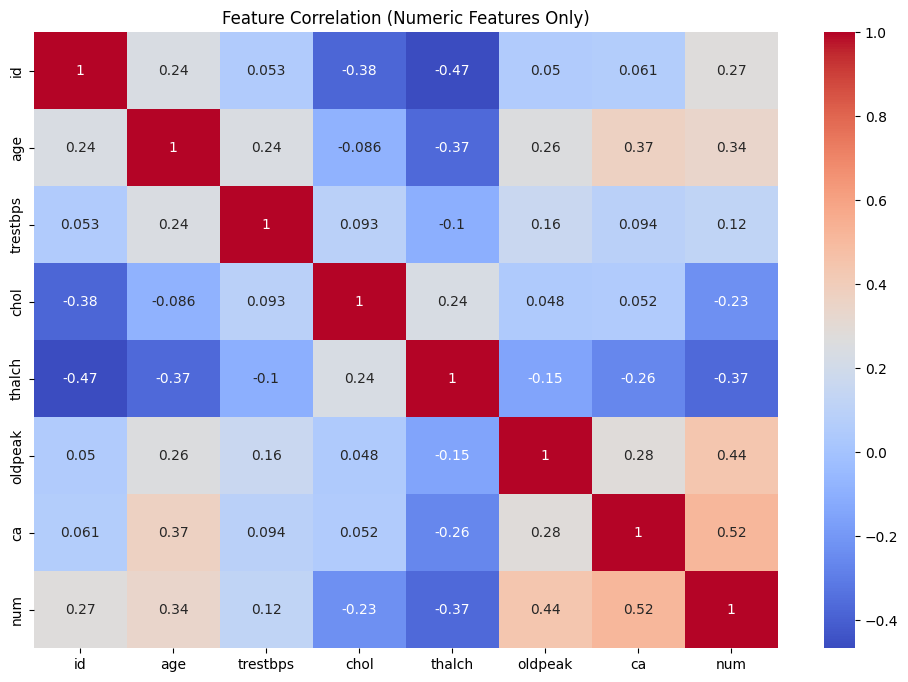

In [ ]:
#Showing Target distribution, Heat map to see how dataset is distribute
sns.countplot(x='num', data=df)
plt.title("Heart Disease Distribution")
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation(Numeric Features Only)")
plt.show()


### Splitting other Features and Target feature for Model Training

In [49]:

# 1. Encode 'sex'
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Drop non-numeric columns not needed
df = df.drop(['id', 'dataset'], axis=1)

# 4. One-hot encode categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop('num', axis=1)
y = df['num']

y_binary = y.copy()
y_binary[y_binary > 0] = 1


# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# 6. Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Classification Models
 Logistic Regression

In [50]:
logis_model = LogisticRegression(random_state=42)
logis_model.fit(X_train_scaled, y_train)
y_pred_log = logis_model.predict(X_test_scaled)


 Decision Tree

In [51]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


### Evaluate Model

Logistic Regression Accuracy: 0.5597826086956522
Decision Tree Accuracy: 0.5
Logistic Regression Confusion Matrix:
 [[65 10  0  0  0]
 [21 30  0  3  0]
 [ 5 11  3  5  1]
 [ 5 11  5  4  1]
 [ 0  1  0  2  1]]
Decision Tree Confusion Matrix:
 [[58 11  2  3  1]
 [24 17  7  6  0]
 [ 3  4  8  9  1]
 [ 2  9  4  9  2]
 [ 1  0  2  1  0]]
Logistic Regression ROC-AUC: 0.8093629005016798


C:\Users\MR LAPTOP\AppData\Local\Temp\ipykernel_6344\443866647.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


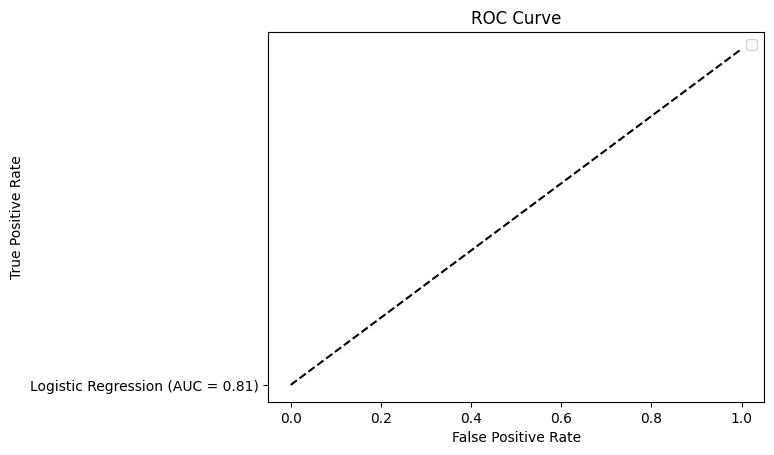

In [56]:
#Printing Accuracy, confusion Matrix, ROC_AUC curve
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Logistic Regression Confusion Matrix:\n", cm_log)
print("Decision Tree Confusion Matrix:\n", cm_tree)

y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
y_prob_log = logis_model.predict_proba(X_test_scaled)
auc_score = roc_auc_score(y_test_bin, y_prob_log, multi_class='ovr')
print("Logistic Regression ROC-AUC:", auc_score)

plt.plot(f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Feature Importance
 Logistic Regression

In [57]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logis_model.coef_[0]}).sort_values(by='Importance', ascending=False)
print(feature_importance)


                     Feature  Importance
7         cp_atypical angina    0.771869
3                       chol    0.457113
8             cp_non-anginal    0.416166
9          cp_typical angina    0.273168
4                     thalch    0.257581
11            restecg_normal    0.176146
16               thal_normal    0.120604
15           slope_upsloping   -0.006162
2                   trestbps   -0.058050
12  restecg_st-t abnormality   -0.077751
10                  fbs_True   -0.149908
0                        age   -0.220604
17    thal_reversable defect   -0.248468
13                exang_True   -0.264247
14                slope_flat   -0.322801
1                        sex   -0.519161
5                    oldpeak   -0.601375
6                         ca   -0.604503


Decision Tree

In [58]:
tree_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(tree_importance)


                     Feature  Importance
3                       chol    0.156280
0                        age    0.143329
4                     thalch    0.125295
5                    oldpeak    0.123103
2                   trestbps    0.099256
13                exang_True    0.090385
6                         ca    0.053624
1                        sex    0.032246
14                slope_flat    0.025807
7         cp_atypical angina    0.025273
8             cp_non-anginal    0.023789
11            restecg_normal    0.020999
10                  fbs_True    0.020129
12  restecg_st-t abnormality    0.019379
15           slope_upsloping    0.017394
16               thal_normal    0.012569
17    thal_reversable defect    0.007690
9          cp_typical angina    0.003457


### Final Insights

        Logistic Regression perform better then Decision tree beacuse its ROC_AUC is high
        AUC=0.81 means model is able to detect high disease risk very well
        Overall accuracy is low, so class balancing and binary classification is needed ofr improvement